In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [2]:
import os

In [3]:
%matplotlib inline

In [4]:
PATH = '../../data/parking'

In [5]:
csvs_parking = [p for p in os.listdir(PATH) if p[-4:] == '.csv'];csvs_parking

['Parking Citations 2016 Jan-June.csv',
 'Parking Citations 2016 July-Sept.csv',
 'Parking Citations 2016 Oct-Dec.csv',
 'Parking Citations 2017.csv',
 'Parking Citations 2018 Thru 3-24-18.csv',
 'processed_all.csv',
 'processed_location_data.csv',
 'processed_shared_columns.csv',
 'processed_timedata.csv',
 'Violation Codes.csv']

In [6]:
test = f"{PATH}/{csvs_parking[0]}"

In [8]:
test

'../../data/parking/Parking Citations 2016 Jan-June.csv'

In [49]:
def flatten_time(t):
    hour, minute = t.split(':')
    return 60*int(hour) + int(minute)

In [56]:
df["Time_Flat"] = df["Issue T"].map(flatten_time)

In [57]:
df["Hour"] = df["Issue T"].map(lambda x: x.split(':')[0]).astype("int64")

In [58]:
df["Minute"] = df["Issue T"].map(lambda x: x.split(':')[1]).astype("int64")

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104204 entries, 0 to 104203
Data columns (total 15 columns):
Cite Number    104204 non-null object
Issue Date     104204 non-null object
Issue T        104204 non-null object
Violat         104204 non-null object
Sublocatio     100041 non-null object
Street         104204 non-null object
Meter #        55049 non-null object
Is Wa          104204 non-null object
Void Rea       3736 non-null object
Due            104204 non-null float64
Payme          35613 non-null float64
AgeWhenP       35613 non-null float64
Time_Flat      104204 non-null int64
Hour           104204 non-null int64
Minute         104204 non-null int64
dtypes: float64(3), int64(3), object(9)
memory usage: 11.9+ MB


Let's take a quick look at what columns are available to us since they run off the screen

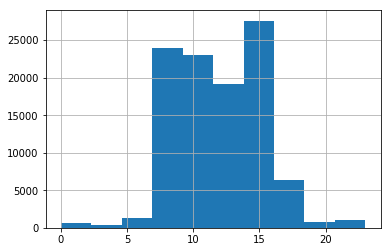

In [64]:
df["Hour"].hist()